# Supervised Learning Project

## Bank loan (Classification model)
### Alok Sawant 

## Importing the Libraries 

In [1]:
import pandas as pd 
import numpy as np
from sklearn import svm 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from scipy.stats import zscore

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import roc_curve, auc

### Function to calculate accuracy 

In [2]:
def getAccuracy(testSet, predictions):
        correct = 0
        for x in range(len(testSet)):
            if testSet[x] == predictions[x]:
                correct += 1
        return (correct/float(len(testSet)))*100.0

## Import the data 

In [3]:
bdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bdata.shape

(5000, 14)

The given data set contains 5000 rows and 14 columns 

In [4]:
bdata.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All the values in the given data set are numerical 

In [6]:
bdata.isnull().sum() # Check for null values in data

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

 Their is no null value in the given data set 

In [7]:
bdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Experience column shows negative number which can be incorrect information so need to check for total negative numbers in experience column 

In [8]:
negative_entries = bdata[bdata['Experience']<0]
negative_entries['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

To replace negative values in Experience colume lets analyse the distribution of the data in columns

In [9]:
bdata.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

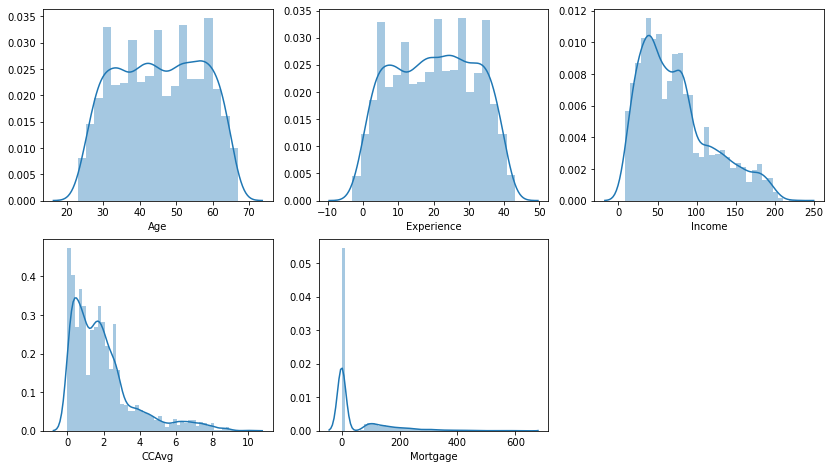

In [10]:
col= ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'] # Not selecting categorica data columns 
i=3
j=0
plt.figure(figsize=(14,12))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(bdata[k])
    j=j+1
plt.show()

The above distribution plots show that the data is normally distributed for Age and Experience column. The mean age of the customer is around 45. For income, CCAvg and Mortgage data is positively skewed as the median of all the data is less than the mean of respective data. 

The negative values in the Experience colum seems to be junk values and can be replaced by the median of the Experience values 

In [11]:
negative_value = [-1, -2, -3]

for i in negative_value:
    bdata['Experience'] = bdata['Experience'].replace(negative_value, np.median(bdata['Experience']))

In [12]:
bdata['Experience'].describe()

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

Now negative value from the Experience column is replaced with the median value of the Experience column

## Finding corelations between the different features in the data

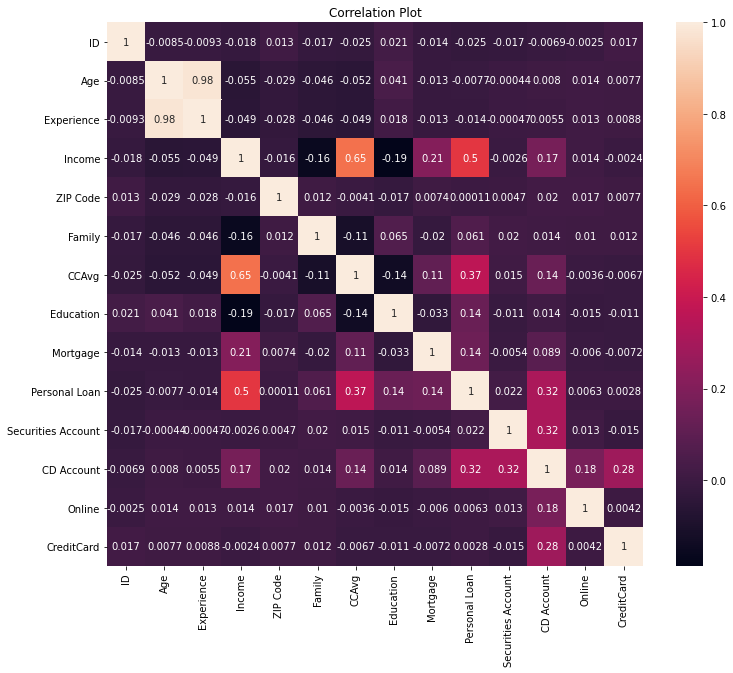

In [13]:
corr = bdata.corr()

# Plotting corelations using heatmap

plt.figure(figsize=(12,10))
plt.title("Correlation Plot")
sns.heatmap(corr, annot=True)
plt.show()



In [14]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)


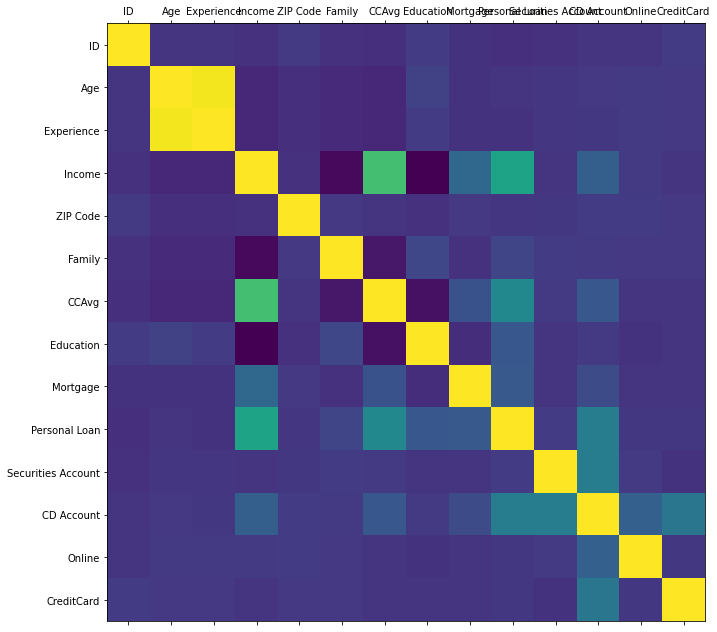

In [15]:
plot_corr(bdata)

The above plot shows that the Age and Experience column are highly positively correlated to each other and this can create an issue with multicollinearity. To avoid this issue Experience column can be dropped from the given data set.  

In [16]:
bdata = bdata.drop(['ID', 'ZIP Code','Experience'], axis=1) # Customeer Id column & Zipcode can be dropped as well

In [17]:
bdata.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

## Analysing Multivarient features from the data

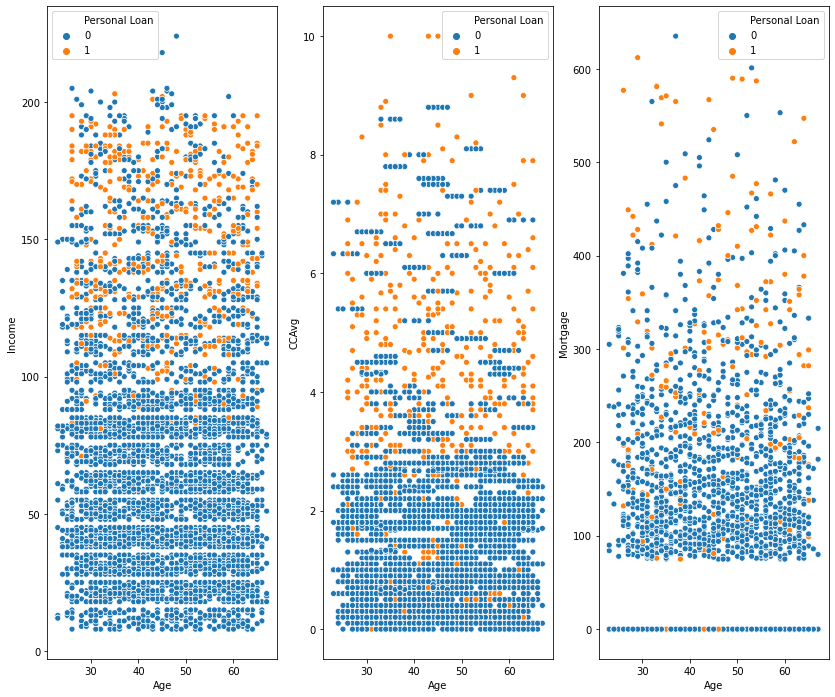

In [18]:
col = ['Income', 'CCAvg', 'Mortgage']
plt.figure(figsize=(14,12))
j=3
k=0
for i in col:
    plt.subplot(1,j,j*(k+1)//j)
    sns.scatterplot(x='Age',y=i,hue='Personal Loan', data=bdata)
    k=k+1
plt.show()

The above plot shows that the people with income higher than 100\\$ have opted for the loan and similarly, people with CCAvg > 2.5 have opted for the loan. Mortgage value is not much correlated with the personal loan but the people with Mortgage value more than 400$ have mostly opted for the loan.  

## Analysing categorical features from the data

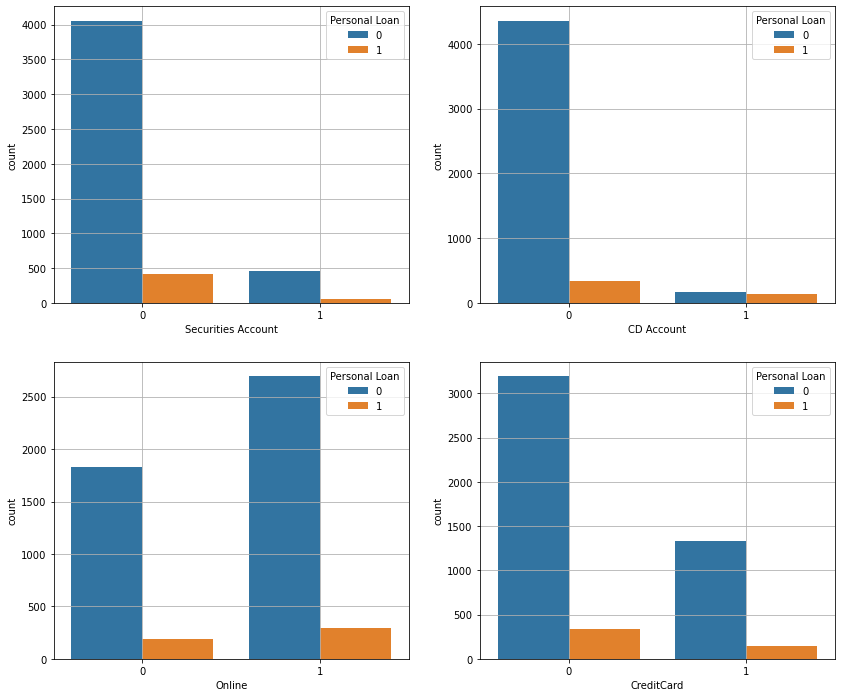

In [19]:
col=['Securities Account','CD Account','Online','CreditCard']
plt.figure(figsize=(14,12))
j=2
k=0
for i in col:
    plt.subplot(2,j,j*(k+1)//j)
    sns.countplot(x=i,hue='Personal Loan', data=bdata)
    k=k+1
    plt.grid(True)
plt.show()

The above plot shows that very few people without a security account with the bank has opted for the personal loan. Most of the people with CD account with the bank have taken a personal loan. People with more online account seems to take a personal loan. Most of the people who have got creat card from the bank have not taken the personal loan.   

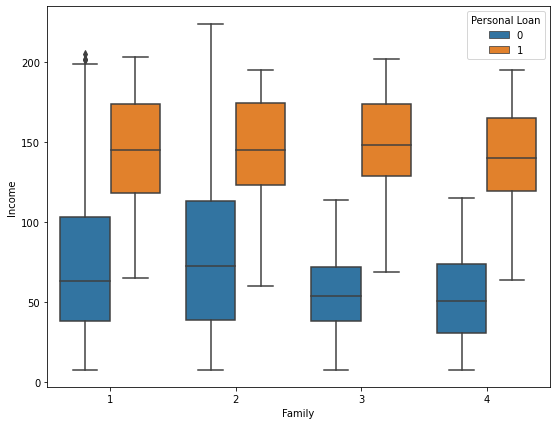

In [20]:
plt.figure(figsize=(9,7))
sns.boxplot(x='Family',y='Income',hue='Personal Loan', data=bdata)
plt.show()

Above plot shows that irrespective of family size people with higher income have opted fot the personal loan 

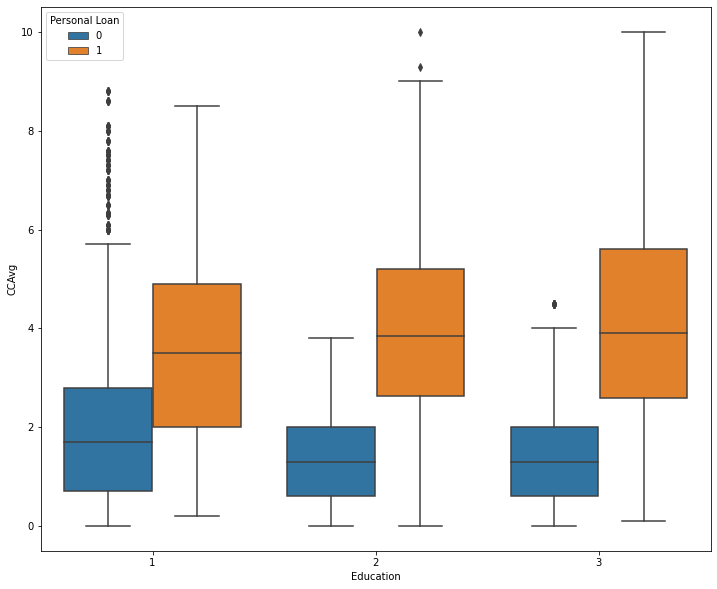

In [21]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Education',y='CCAvg',hue='Personal Loan', data=bdata)
plt.show()

Above plot shows that irrespective of Education, people with higher CCAvg > 2.5 have opeted for the personal loan. 

## Checking class balance for personal loan column in the data set

In [22]:
bdata['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

The above figures shows class imbalance for the feature, this can be rectified by spliting the data and using upsample method

In [23]:
# Splitting data with loan and without loan 
with_loan=bdata[bdata['Personal Loan']==1]
without_loan=bdata[bdata['Personal Loan']==0]
with_loan.shape


(480, 11)

In [24]:
without_loan.shape

(4520, 11)

## upsampling data for the people with personal loan 

In [120]:
from sklearn.utils import resample
with_loan=resample(with_loan,n_samples=4520)
with_loan.shape

(4520, 11)

In [121]:
bdata = pd.concat([without_loan, with_loan]) # meargin without_loan and resampled with loan data
bdata['Personal Loan'].value_counts()

1    4520
0    4520
Name: Personal Loan, dtype: int64

Now that class is balanced we can start building model 

# Model building 

In [122]:
x = bdata.drop(['Personal Loan'], axis=1)
y = bdata['Personal Loan']

## Splitting the data for training and testing set in (70:30) ratio

In [123]:
IndexError: invalid index to scalar variable.

## Building KNN model

In [124]:
NNH = KNeighborsClassifier( weights = 'distance' )

In [125]:
NNH.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [133]:
predicted_labels = NNH.predict(x_test)
NNH.score(x_test, y_test)


0.9067109144542773

In [134]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,predicted_labels)

array([[1126,  253],
       [   0, 1333]])

Confusion Matrix


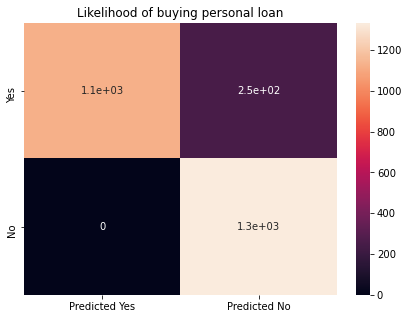

In [135]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels)

bdata_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Predicted Yes","Predicted No"]])
plt.figure(figsize = (7,5))
plt.title("Likelihood of buying personal loan")
sns.heatmap(bdata_cm, annot=True)

The KNN model did not show any type 1 error in the predicted data for the given dataset while it showed a small margin of type 2 error. The overall accuracy of the model is calculated to be 94% by using default K value (which is 5.3 in Skickit-Learn library) 

##  Tuning K parameter

In [136]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train)
    scores.append(NNH.score(x_test, y_test))

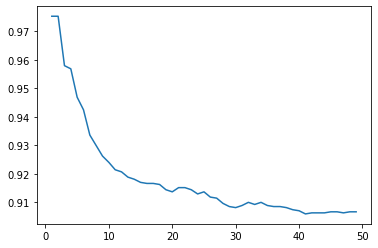

In [137]:
plt.plot(range(1,50),scores)

Tuning k parameter for the given data set shows that the smaller value of the K parameter showed higher accuracy of result while increasing K value it reduced its accuracy

## Compute ROC curve and AUC

In [138]:
probas1_ = NNH.fit(x_train, y_train).predict_proba(x_test)
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.999340


## Building Naive Bayes Algorithm 

In [109]:
Naive_model = GaussianNB()
Naive_model.fit(x_train, y_train)

GaussianNB()

In [110]:
predicted_labels = Naive_model.predict(x_test)
Naive_model.score(x_test, y_test)

0.821165191740413

In [111]:
confusion_matrix(y_test,predicted_labels)

array([[1213,  169],
       [ 316, 1014]])

Confusion Matrix


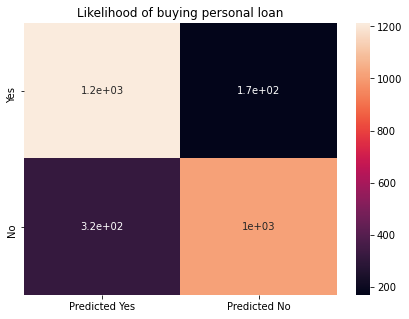

In [112]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels)

bdata_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Predicted Yes","Predicted No"]])
plt.figure(figsize = (7,5))
plt.title("Likelihood of buying personal loan")
sns.heatmap(bdata_cm, annot=True)

## Compute ROC curve and AUC

In [113]:
probas2_ = Naive_model.fit(x_train, y_train).predict_proba(x_test)
# Compute ROC curve and area the curve for logistic
fpr2, tpr2, thresholds1 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.924212


## Building Logistic Regression model 

In [114]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [115]:
predicted_labels = model.predict(x_test)
model.score(x_test, y_test)

0.8934365781710915

In [116]:
confusion_matrix(y_test,predicted_labels)

array([[1236,  146],
       [ 143, 1187]])

Confusion Matrix


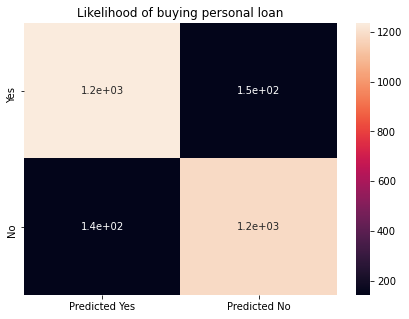

In [117]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels)

bdata_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Predicted Yes","Predicted No"]])
plt.figure(figsize = (7,5))
plt.title("Likelihood of buying personal loan")
sns.heatmap(bdata_cm, annot=True)

## Compute ROC curve and AUC

In [118]:
probas3_ = model.fit(x_train, y_train).predict_proba(x_test)
# Compute ROC curve and area the curve for logistic
fpr3, tpr3, thresholds1= roc_curve(y_test, probas3_[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curve : %f" % roc_auc3)

Area under the ROC curve : 0.958389


##  Model Performance Evaluation 

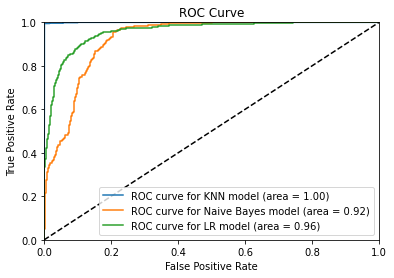

In [140]:
# Plot the ROC
import pylab as pl

# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for KNN model (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for Naive Bayes model (area = %0.2f)' % roc_auc2)
pl.plot(fpr3, tpr3, label='ROC curve for LR model (area = %0.2f)' % roc_auc3)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC Curve')
pl.legend(loc="lower right")
pl.show()


The above predictions shows that Naive Bayes model showed accuray of 83%, whereas Logistic Regression showed accuracy of 89%. This is because the Naive Bayes is generative model while Logistic Regression is discrimative model. Naive Bayes also assumes that the features are conditionally independent. Real data sets are never perfectly independent but they can be close. In short Naive Bayes has a higher bias but lower variance compared to logistic regression. If the data set follows the bias then Naive Bayes will be a better classifier. Both Naive Bayes and Logistic regression are linear classifiers, Logistic Regression makes a prediction for the probability using a direct functional form where as Naive Bayes figures out how the data was generated given the results. 

KNN is non-paraematric model whereas linear regression is parametric model. Logistic regression learns a linear classifier, while k-nearest neighbors can learn non-linear boundaries as well. Logistic regression predicts probabilities, while k-nearest neighbors predicts just the labels. Hence the accuracy of KNN model for the given data is 96%. 

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. Above performance plot and AUC value shows that KNN model performs better compare to LR and Naive Bayes model. LR predicted second-best results compare to other models and Naive Bayes model didn't perform well as compare to the other two models. 


